## Introduction

In this section, I will be exploring a loan data set and analysing which factors affect whether or not someone will default a loan or not. Defaulting a loan is when you are unable to make a payment on time, hence breaching the loan contract. This is slitghly different to seeing whether or not a loan will be approved, however it is important to see also as it will show what information is most likely to cause problems during the approval process from a banks point of view. Hence therefore is highly related and interesting to see if the those rejected in the approval process and those that default a loan aline with similar income, age and other factors.



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("LoanData_Preprocessed_v1.2.csv") 
df

,age,employ,address,income,debtinc,creddebt,othdebt,ed,default
0,29,11,7,32.000000,6.0,0.927360,0.992640,1,0
1,28,1,3,26.000000,12.4,0.377208,2.846792,4,0
2,34,16,3,75.000000,10.4,3.954600,3.845400,1,0
3,51,31,14,249.000000,7.8,4.272840,15.149160,2,0
4,40,13,11,102.000000,18.9,6.226794,13.051206,2,1
...,...,...,...,...,...,...,...,...,...
480,41,16,17,68.000000,5.4,0.447984,3.224016,1,0
481,23,0,1,42.000000,3.9,1.018836,0.619164,2,1
482,47,26,21,100.000000,12.8,4.582400,8.217600,1,0
483,24,7,0,18.000000,6.5,0.526500,0.643500,1,0


This is a preproccessed data set but just to check if there any missing values:

In [16]:
df.isnull().sum()

age         0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
ed          0
default     0
dtype: int64

age            int64
employ         int64
address        int64
income       float64
debtinc      float64
creddebt     float64
othdebt      float64
ed             int64
default     category
dtype: object


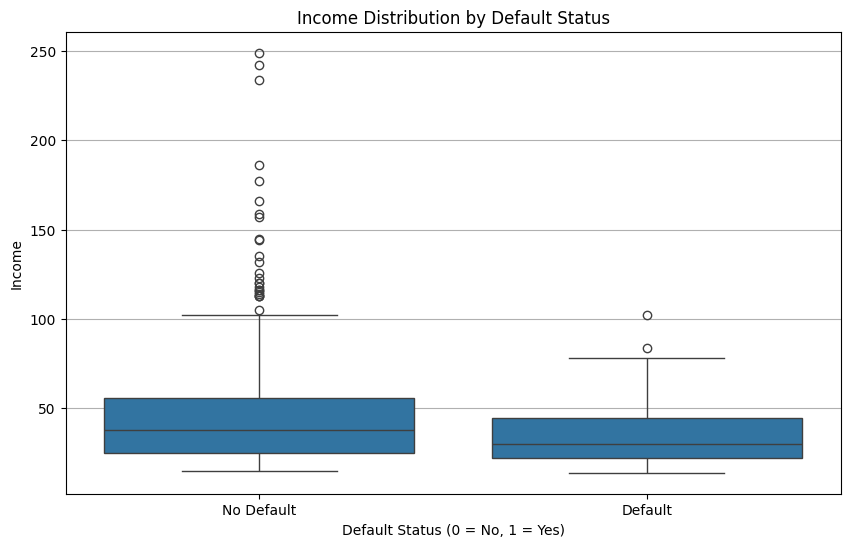

In [22]:

print(df.dtypes)
df['default'] = df['default'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='income', data=df)
plt.title('Income Distribution by Default Status')
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(axis='y')
plt.show()


Education level corresponds to the highest level of education of a person, 1 being the lowest corresponding to High school, 2 = Undergraduate, 3=Graduate, 4=Postgraduate, 5+=Beyond

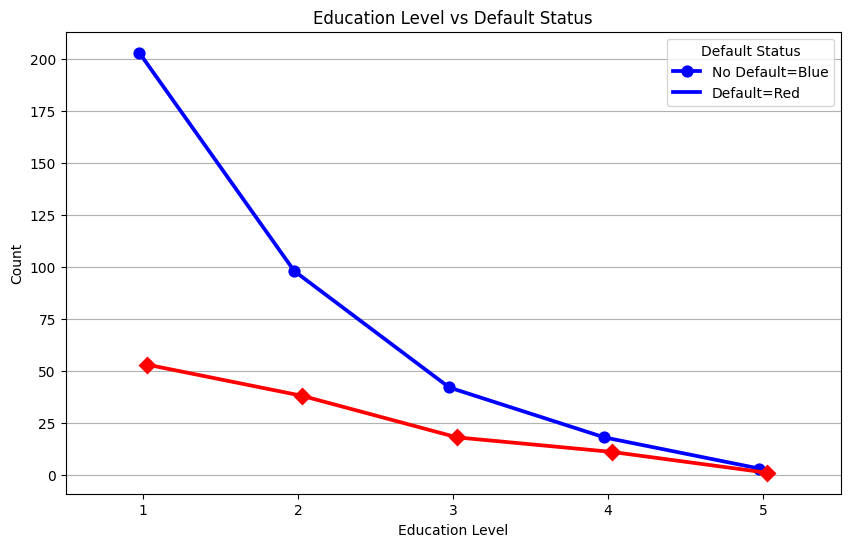

In [27]:
plt.figure(figsize=(10, 6))
palette = {0: 'Blue', 1: 'Red'}

sns.pointplot(data=edu_default_counts, x='ed', y='count', hue='default', palette=palette, markers=["o", "D"], dodge=True)

plt.title('Education Level vs Default Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4', '5'])
plt.legend(title='Default Status', labels=['No Default=Blue', 'Default=Red'], loc='upper right')
plt.grid(axis='y')
plt.show()

This for the most part is inconclusive to suggest that any education level results in more likely chance of defaulting a loan, there is slight evidence to suggest that being a postgraduate or having a higher education level could result in higher chance but small sample size. 

Having done a brief investigation into seeing a correlation between two random features and defaulting a loan, We will now have a look at which features have a high correlation via a heatmap and then looking at each pairwise plot to see what features to investigate further

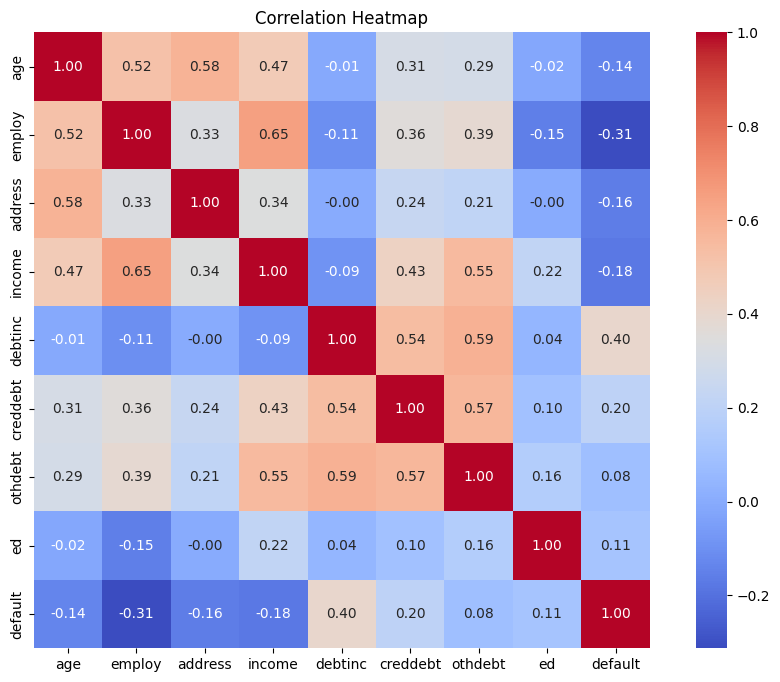

In [20]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


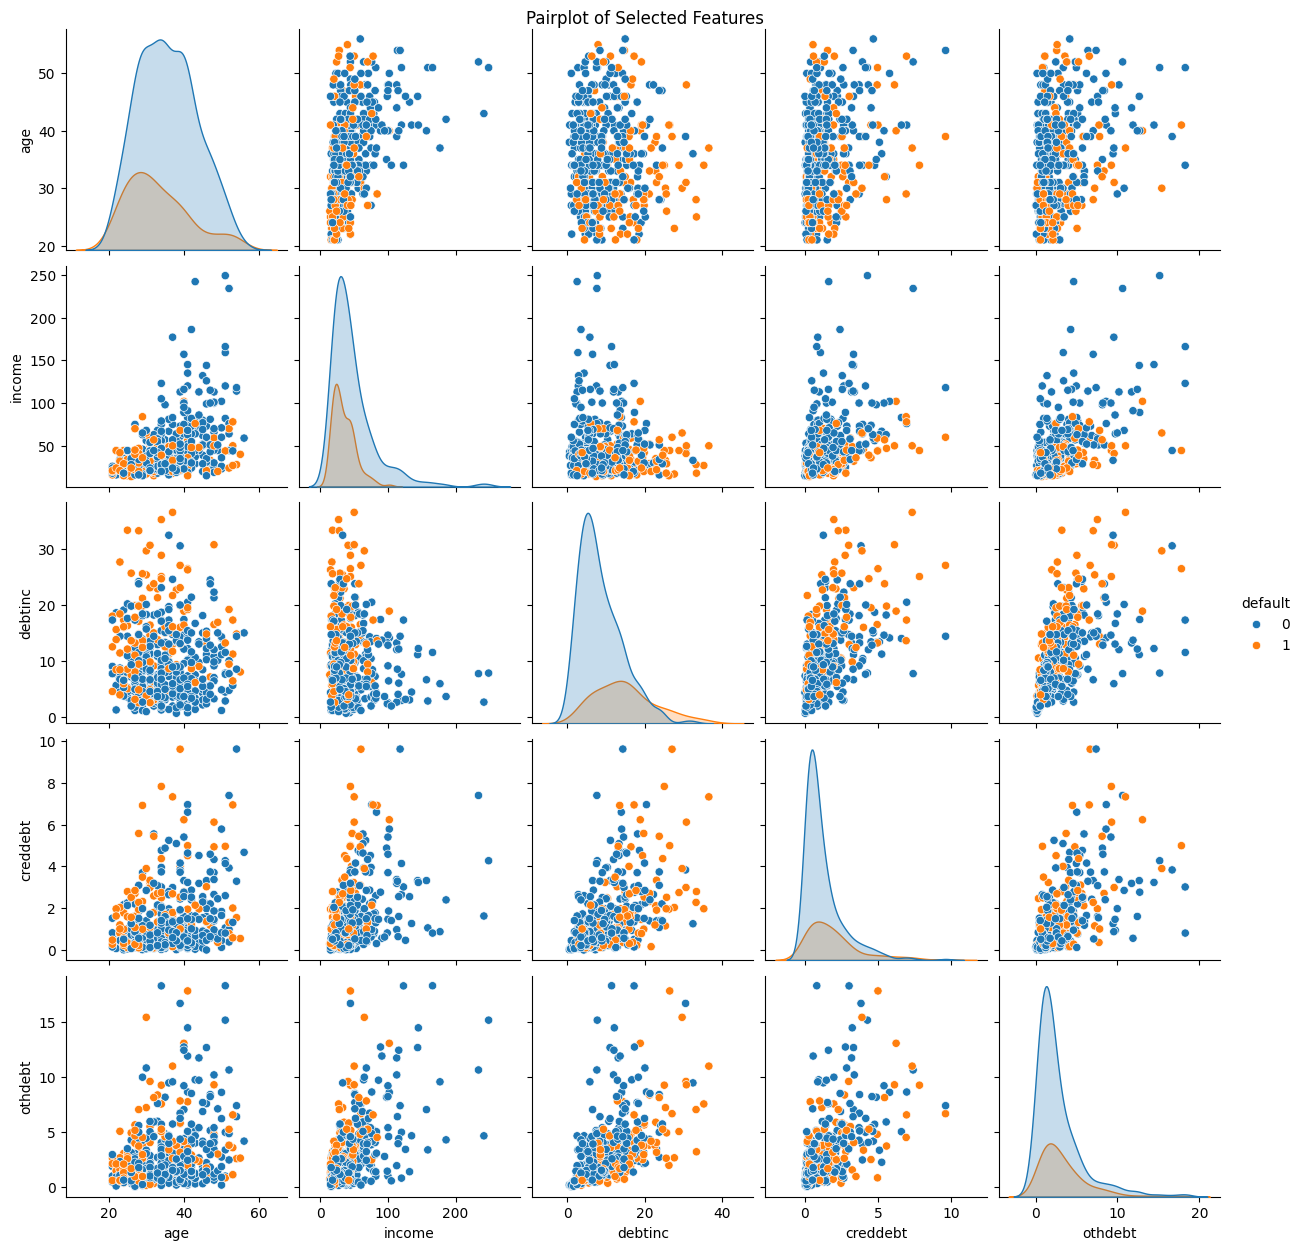

In [29]:
sns.pairplot(data=df, hue='default', vars=['age', 'income', 'debtinc', 'creddebt', 'othdebt'])
plt.suptitle('Pairplot of Selected Features', y=1.00)
plt.show()


The graphs on the diagonal show the better the distrubition of the its own data. Below is an enlarged version of one of these pairwise plots.

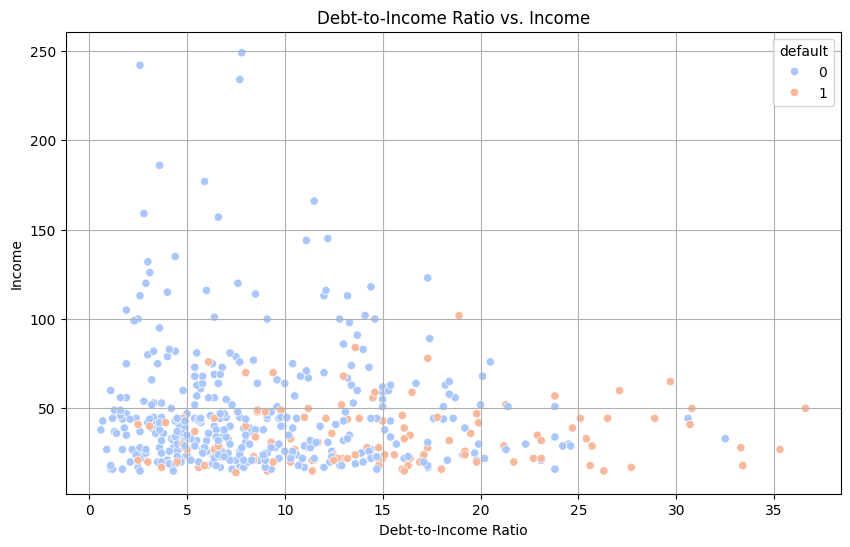

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='debtinc', y='income', hue='default', data=df, palette='coolwarm')
plt.title('Debt-to-Income Ratio vs. Income')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Income')
plt.grid()
plt.show()